In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize coefficients
W = np.zeros(X.shape[1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss (binary cross-entropy) function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip to avoid log(0)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_BGD = []


In [123]:
# Create a matrix of ones with the same number of rows as X
one_matrix = np.ones((X.shape[0], 1))

# Reshape y to ensure it has the right shape for calculations
y = y.reshape(-1, 1)

# Initialize coefficients
W = np.zeros(X.shape[1])

# Reshape W to ensure it has the right shape for calculations
W = W.reshape(-1, 1)

# Perform gradient descent
for i in range(iterations):
    # Calculate predicted probabilities using the sigmoid function
    y_pred = sigmoid(np.dot(X, W))

    # Calculate the logistic loss and store it in the loss_history list
    loss = log_loss(y, y_pred)
    loss_history_BGD.append(np.mean(loss))

    # Calculate the residuals (difference between predicted and true labels)
    residuals = y_pred - y

    # Reshape residuals for matrix multiplication with one_matrix
    residuals = residuals.reshape(1, -1)

    # Create a diagonal matrix with residuals
    diagonal_residuals = np.diag(residuals[0])

    # Compute the gradient and update the weights
    gradient = one_matrix.T @ diagonal_residuals @ X
    gradient = gradient.T / y.shape[0]

    # Update the weights using gradient descent
    W -= learning_rate * gradient

    # Print the loss for each iteration
    print('Loss for iteration {}: {}'.format(i, np.mean(loss)))

    


Loss for iteration 0: 0.6931471805599454
Loss for iteration 1: 0.6328211522065751
Loss for iteration 2: 0.5823972949578101
Loss for iteration 3: 0.5400400231011129
Loss for iteration 4: 0.5042051102371915
Loss for iteration 5: 0.4736389534183553
Loss for iteration 6: 0.44734329598374695
Loss for iteration 7: 0.4245298511469433
Loss for iteration 8: 0.4045770169455826
Loss for iteration 9: 0.38699321002389653


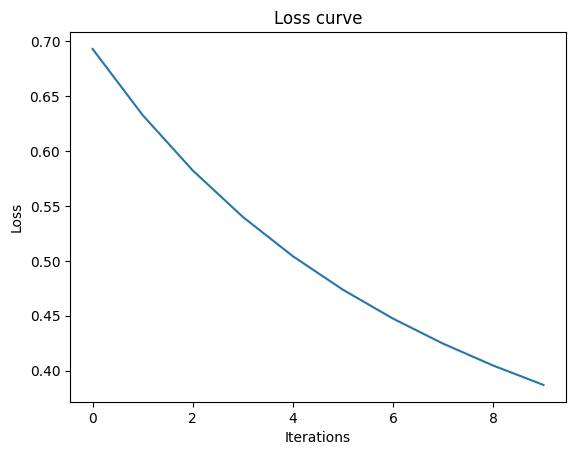

In [124]:
# Plot the loss curve with respect to iterations
plt.plot(loss_history_BGD)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

In [125]:
# Initialize coefficients for Newton's method
W_newton = np.zeros(X.shape[1])

# Newton's method parameters
iterations_newton = 10
loss_history_Newton = []


# Create a matrix of ones with the same number of rows as X
one_matrix = np.ones((X.shape[0], 1))

# Reshape W to ensure it has the right shape for calculations
W_newton = W_newton.reshape(-1, 1)

# Perform gradient descent
for j in range(iterations_newton):
    # Calculate predicted probabilities using the sigmoid function
    y_pred_newton = sigmoid(np.dot(X, W_newton))

    # Calculate the logistic loss and store it in the loss_history list
    loss_newton = log_loss(y, y_pred_newton)
    loss_history_Newton.append(np.mean(loss_newton))

    # Calculate the residuals (difference between predicted and true labels)
    residuals = y_pred_newton - y

    # Define the learning rate
    # Here learning rate is ((1/N)*(X.T @ S @ X))^-1 where S = diag(s1, s2, ..., sN)
    # si = sigmoid((W_newton.T @ xi) - yi) * (1 - (sigmoid(W_newton.T @ xi)) - yi)
    # Note that si is a scalar value
    s = (y_pred_newton - y) * (1 - y_pred_newton - y)

    # Create a diagonal matrix with s
    S = np.diag(s.reshape(-1))

    learning_rate = np.linalg.inv((1 / X.shape[0]) * (X.T @ S @ X))

    # Reshape learning rate as  for matrix multiplication with gradient
    #learning_rate = learning_rate.reshape(-1, 1)

    # Reshape residuals for matrix multiplication with one_matrix
    residuals = residuals.reshape(1, -1)

    # Create a diagonal matrix with residuals
    diagonal_residuals = np.diag(residuals[0])

    # Compute the gradient and update the weights
    gradient = one_matrix.T @ diagonal_residuals @ X
    gradient = gradient.T / y.shape[0]


    # Update the weights using gradient descent
    W_newton -= learning_rate @ gradient

    # Print the loss for each iteration
    print('Loss for iteration {}: {}'.format(j, np.mean(loss_newton)))

Loss for iteration 0: 0.6931471805599454
Loss for iteration 1: 0.1932642413241019
Loss for iteration 2: 0.09113723316903417
Loss for iteration 3: 0.049380588107335664
Loss for iteration 4: 0.030716074598479744
Loss for iteration 5: 0.02202254993197046
Loss for iteration 6: 0.01807356045399719
Loss for iteration 7: 0.01661803272262815
Loss for iteration 8: 0.016323457755770703
Loss for iteration 9: 0.01630719622923481


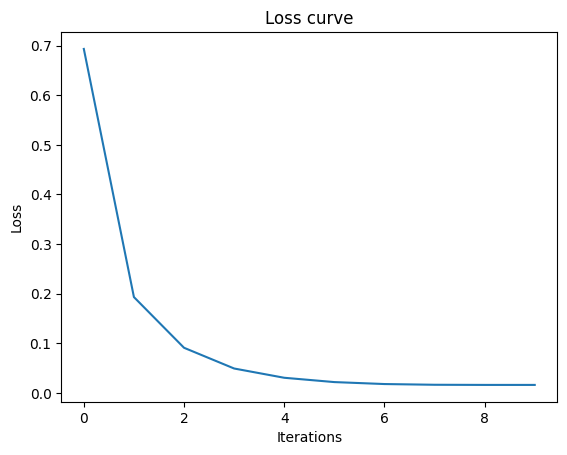

In [126]:
# Plot the loss curve with respect to iterations
plt.plot(loss_history_Newton)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()

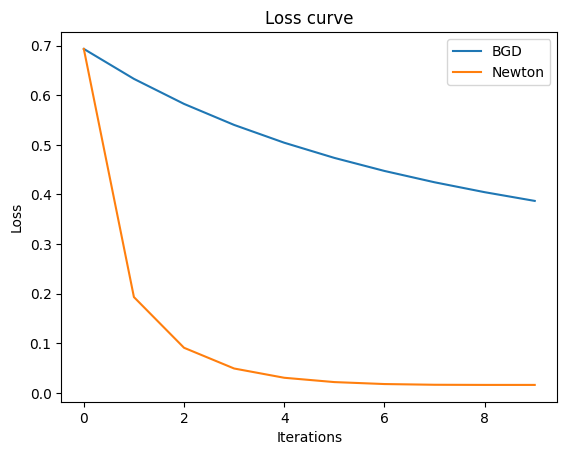

In [127]:
# Plot loss functions in a same graph
plt.plot(loss_history_BGD, label='BGD')
plt.plot(loss_history_Newton, label='Newton')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.legend()
plt.show()

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

# Data loading
train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)

# You can continue with your machine learning model training and evaluation here.
# This code section sets up the dataset for further processing.
# You can add your machine learning model, preprocessing steps, and evaluation metrics.


c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [148]:
# Create a pipeline for Lasso Logistic Regression
lasso_logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("lasso_logistic", LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))  # Lasso Logistic Regression
])

# Hyperparameter grid for tuning C (inverse of regularization strength)
param_grid = {
    'lasso_logistic__C': np.logspace(-2, 2, 9)  # Range for C values
}

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(lasso_logistic_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Predict using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

Best hyperparameters: {'lasso_logistic__C': 0.31622776601683794}
Best accuracy: 0.798
Test set accuracy: 0.79


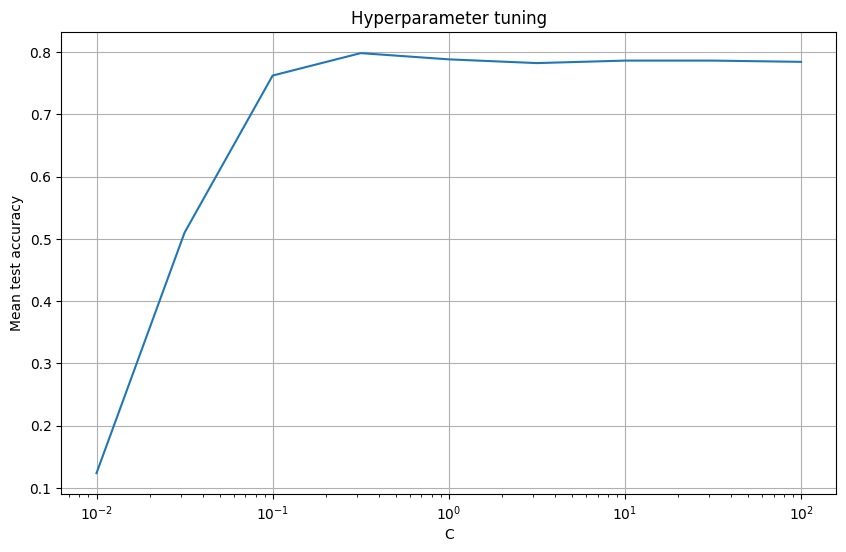

In [149]:
# Plot the classification accuracy with respect to hyperparameter C.
# Note that the best hyperparameter C is the one that maximizes the accuracy.
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['lasso_logistic__C'], grid_search.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('Mean test accuracy')
plt.title('Hyperparameter tuning')
plt.grid()
plt.show()

In [150]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print confusion matrix, precision, recall, and F1-score
print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Confusion Matrix:
[[ 8  0  0  0  0  0  0  1  0  0]
 [ 0 12  0  0  0  0  0  0  1  0]
 [ 0  1 10  1  1  0  1  1  1  0]
 [ 1  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0 10  1  0  0  0  0]
 [ 1  0  0  0  0  3  0  0  0  0]
 [ 1  0  0  0  0  3 10  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  1]
 [ 0  1  0  0  0  1  0  0  8  0]
 [ 0  1  0  0  1  0  0  1  0  6]]
Precision: 0.8259913419913419
Recall: 0.79
F1-Score: 0.793657668418538


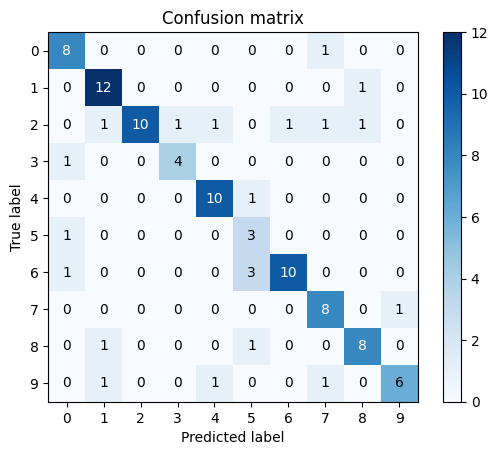

In [151]:
# Plot the confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.title('Confusion matrix')

plt.show()